Univariate analysis - Numerical column

In [2]:
# Using cars data set

import os
import pandas as pd

car = pd.read_excel('Cars.xlsx')

car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


([<matplotlib.axis.XTick at 0x176d4c1c7b8>,
 <a list of 2 Text xticklabel objects>)

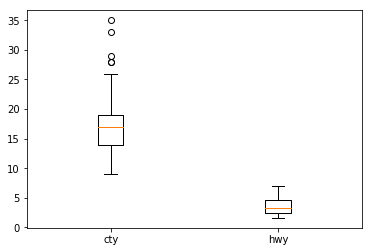

In [4]:
# Creating multiple column box plot - City mileage and highway mileage

# First step is to convert the pandas data frame to a numpy array

from matplotlib import pyplot as plt

data = car[['cty', 'displ']].values

data

plt.boxplot(data)

plt.xticks([1,2], ['cty', 'hwy'])

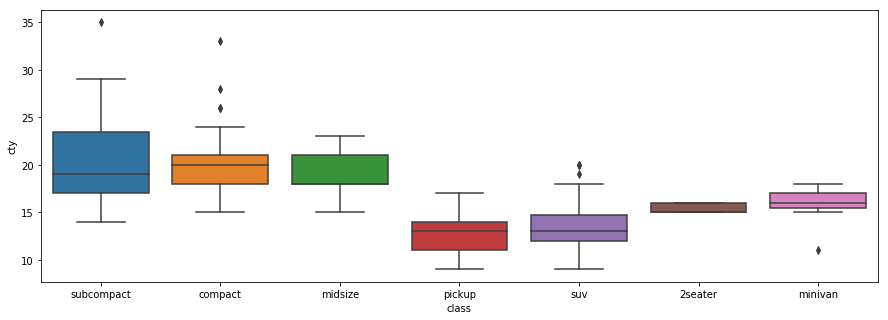

In [5]:
# Using seaborn lib - also adding a categorical column - City milage for each class

import seaborn as sns

plt.rcParams['figure.figsize'] = [15,5]

#sns.boxplot(data=car, x='class', y='cty')

# Controlling the order of diplay of class



order=["subcompact", "compact", "midsize", "pickup", "suv", "2seater", "minivan"]

sns.boxplot(data=car, x='class', y='cty', order=order)

Outlier treatment: 

1) Removing : Create a new data set by removing the outlier from each class
2) Capping: Create a new data set by capping the outlier equal to the upper limit or lower limit of each class

Bivariate Analysis: Analyzing two column together

1) Numerical column vs numerical column
2) Numerical column vs categorical column
3) Categorical column vs categorical column

Numerical column vs numerical column : Analysis that can be performed: 

1) Relation ship analysis - Scatter plot
2) Corelation analysis - Corelation matrix and plot
3) regression analysis - Simple linear regression (SLM)

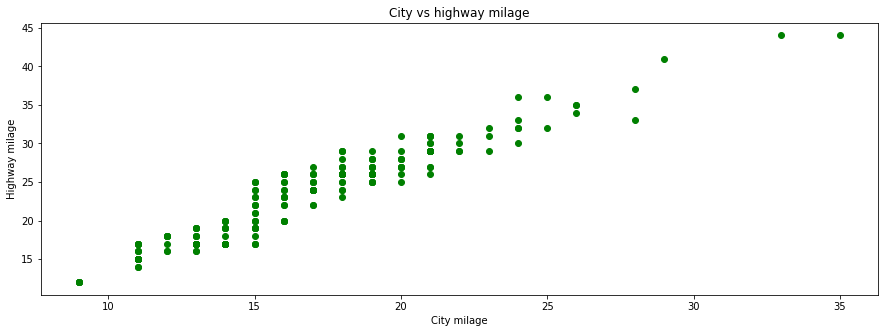

In [12]:
# Relationship analysis - Scatter plot

# Want to understand what kind of relation exist between city milage and highway milage

plt.scatter(car['cty'], car['hwy'], color='green')

plt.xlabel("City milage")

plt.ylabel("Highway milage")

plt.title("City vs highway milage")

plt.show()


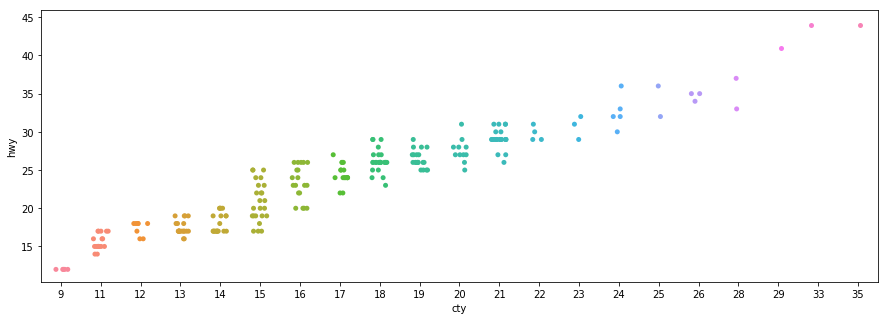

In [18]:
# We can see that not much variation between city and highway milage. Thus if we try ploting the same using scatter plot, 
# We will get the overlapping of data point. One way to avoid the same is to use jitter plot

import seaborn as sns

sns.stripplot(car['cty'], car['hwy'], jitter=0.2, size=5)

plt.show()


This shows that city and highway milage have a linear relationship. which mean changing one variable, the other will also change linearly. The direction of relation is also seems to be positive. 

So far wat we don't know is the magnitude of relationship.

NOTE: Some time during your numerical vs numerical bivariate analysis, you may want to check the relationship between one numerical column vs other numerical columns

In [17]:
# We will use a python inbuild data set for this purpose - mtcars data set

from pydataset import data

df = data('mtcars')

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
# Creating a correlation matrix

Matrix = df.corr()

Matrix.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790


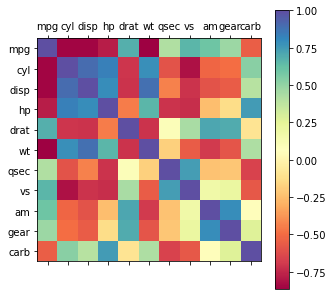

In [20]:
# Ploting the correlation matrix using matshow

# cmap will help you to give a specific color to the matrix

plt.matshow(Matrix, cmap = 'Spectral')

# labeling the xticks and yticks
plt.xticks(range(len(Matrix.columns)), Matrix.columns)

plt.yticks(range(len(Matrix.columns)), Matrix.columns)

# Using the color bar to reference the color 

plt.colorbar()

plt.show()

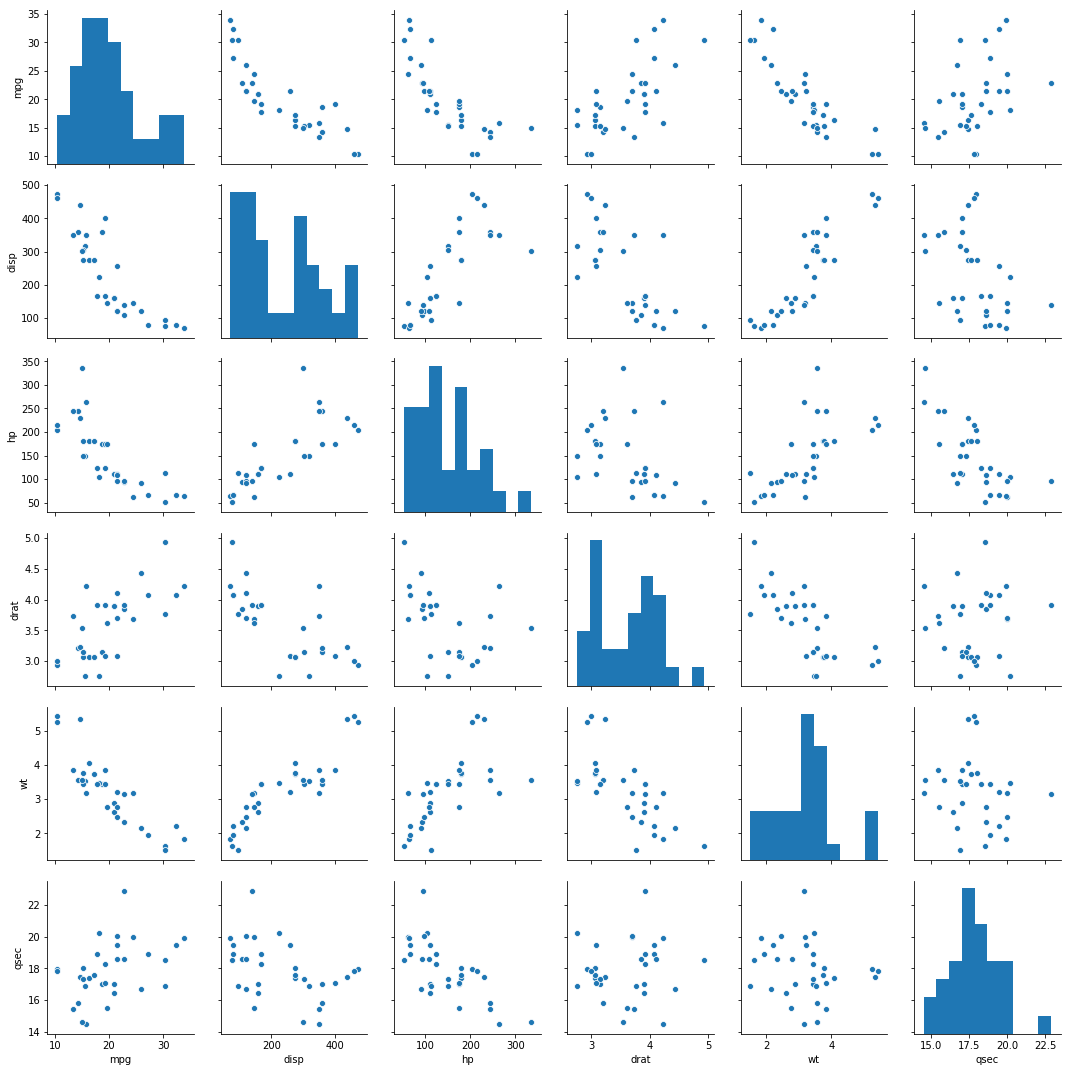

In [24]:
# We can also use pairplot from sns to create a multiple scatter plots and understand the relationship of variables

# Select few numerical column

df_new = df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec']]

# Ploting the pair plot

sns.pairplot(df_new)

plt.show()